<a href="https://colab.research.google.com/github/Man-isH-07/Data-Science-And-Statistics-Practical-Lab/blob/main/DSS_Practicals_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DSS Practicals**

**Practical No. : 2**

Estimated coefficients:
b_0 = 1.2363636363636363            
b_1 = 1.1696969696969697


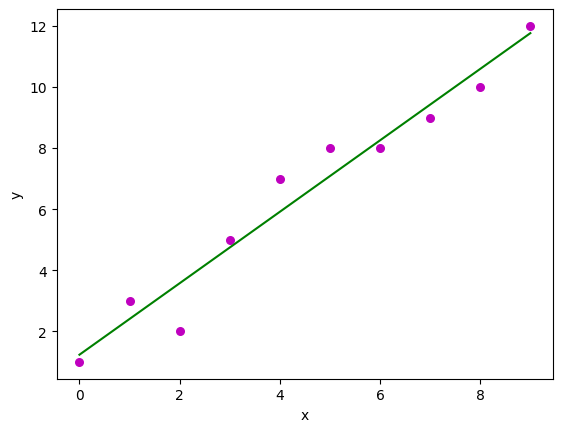

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return (b_0, b_1)

def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)

    # predicted response vector
    y_pred = b[0] + b[1]*x

    # plotting the regression line
    plt.plot(x, y_pred, color = "g")

    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')

    # function to show plot
    plt.show()

def main():
    # observations / data
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))

    # plotting regression line
    plot_regression_line(x, y, b)

if __name__ == "__main__":
    main()

**Practical No. : 3**

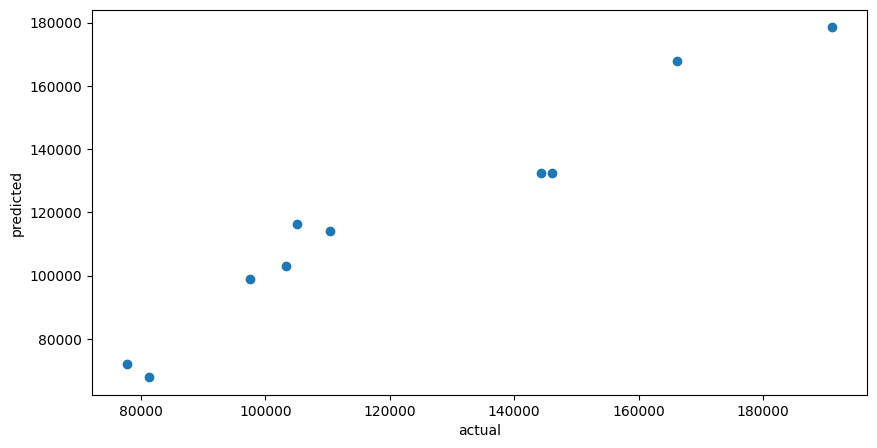

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, 4]

#Convert the column into categorical columns
states=pd.get_dummies(X['State'],drop_first=True)

# Drop the state coulmn
X=X.drop('State',axis=1)

# concat the dummy variables
X=pd.concat([X,states],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)

plt.figure(figsize=(10,5))
plt.scatter(y_test , y_pred)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

**Practical No. : 4**

[1 0]
[[9.99250016e-01 7.49984089e-04]
 [9.99240201e-01 7.59799387e-04]
 [9.99230257e-01 7.69743043e-04]
 ...
 [3.08374822e-03 9.96916252e-01]
 [3.04400296e-03 9.96955997e-01]
 [3.00476842e-03 9.96995232e-01]]


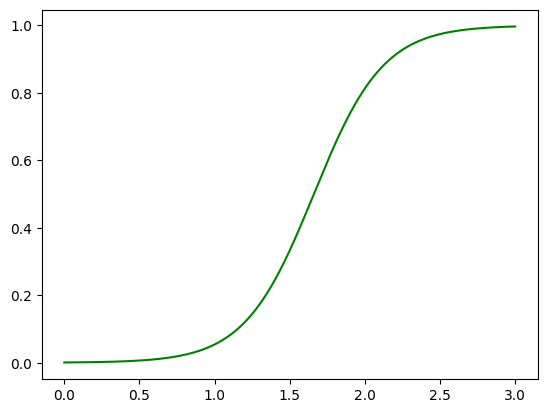

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

iris=datasets.load_iris()

x=iris["data"][:,3:]
y=(iris["target"]==2).astype(int)

c1f =LogisticRegression()
c1f.fit(x,y)
example=c1f.predict(([2.6] , [1.6]))
print(example)

x_new = np.linspace(0,3,1000).reshape(-1,1)
y_prob=c1f.predict_proba(x_new)
print(y_prob)
plt.plot(x_new,y_prob[:,1],"g-")
plt.show()

**Practical No. : 5**

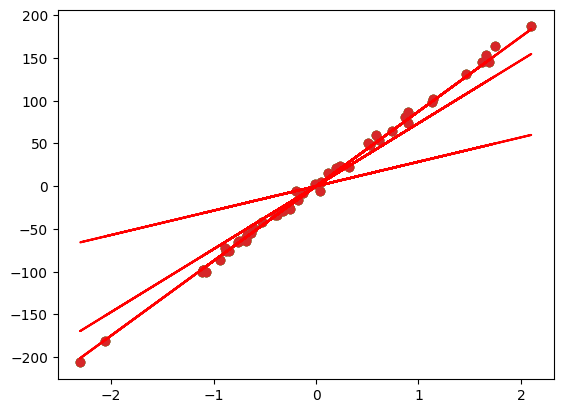

In [ ]:
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge

X, y, coefficients = make_regression(
    n_samples=50,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=5,
    coef=True,
    random_state=1
)

alpha = 1
n, m = X.shape
I = np.identity(m)

w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + alpha * I), X.T), y)

plt.scatter(X, y)
plt.plot(X, w*X, c='red')

rr = Ridge(alpha=1)
rr.fit(X, y)
w = rr.coef_[0]

plt.scatter(X, y)
plt.plot(X, w*X, c='red')

rr = Ridge(alpha=10)
rr.fit(X, y)
w = rr.coef_[0]
plt.scatter(X, y)
plt.plot(X, w*X, c='red')

rr = Ridge(alpha=100)
rr.fit(X, y)
w = rr.coef_[0]
plt.scatter(X, y)
plt.plot(X, w*X, c='red')
plt.show()


**Practical No. : 6**

In [ ]:
import pandas as pd
from numpy import arange
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

data_full = pd.read_csv("mtcars.csv")

#select subset of data
data = data_full[["mpg", "wt", "drat", "qsec", "hp"]]

#view first six rows of data
data[0:6]

#define predictor and response variables
X = data[["mpg", "wt", "drat", "qsec"]]
y = data["hp"]

#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
model = LassoCV(alphas=arange(0.001, 1, 0.01), cv=cv, n_jobs=-1)

#fit model

model.fit(X.values, y)

#display lambda that produced the lowest test MSE
print("lambda that produced the lowest test MSE")
print(model.alpha_)
print("\n")

#define new observation
new = [24, 2.5, 3.5, 18.5]

#predict hp value using lasso regression model
print("hp value using lasso regression model")
print(model.predict([new]))
print("\n")


#define new observation
new1 = [20.123, 2.52, 3.6, 16.5]

#predict hp value using lasso regression model
print("hp value using lasso regression model")
print(model.predict([new1]))


lambda that produced the lowest test MSE
0.9909999999999999


hp value using lasso regression model
[105.63554774]


hp value using lasso regression model
[159.61581998]


**Practical No. : 7**

1. Data Pre-Processing Step:


In [ ]:
# importing libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

#importing datasets
data_set= pd.read_csv('/content/User_Data.csv')

#Extracting Independent and dependent Variable
x= data_set.iloc[:, [2,3]].values
y= data_set.iloc[:, 4].values

# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                   test_size= 0.25,
                                                   random_state=0)

#feature Scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

2. Fitting a Decision-Tree algorithm to the Training set


In [ ]:
#Fitting Decision Tree classifier to the training set
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

3. Predicting the test result


In [ ]:
#Predicting the test set result
y_pred= classifier.predict(x_test)

4. Test accuracy of the result (Creation of Confusion matrix)


In [ ]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)

5. Visualizing the training set result:


<ipython-input-71-87312b9a87b0>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


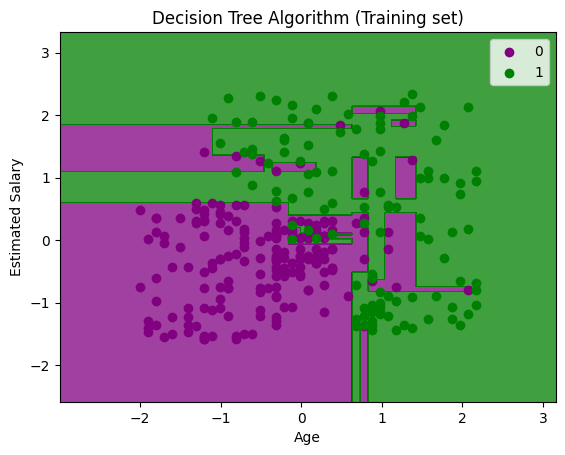

In [ ]:
#Visulaizing the trianing set result
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('purple','green' )))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
for i,j in enumerate(nm.unique(y_set)):
 mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
        c = ListedColormap(('purple', 'green'))(i), label = j)
mtp.title('Decision Tree Algorithm (Training set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()


6. Visualizing the test set result:


<ipython-input-75-f87cfe2e0458>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


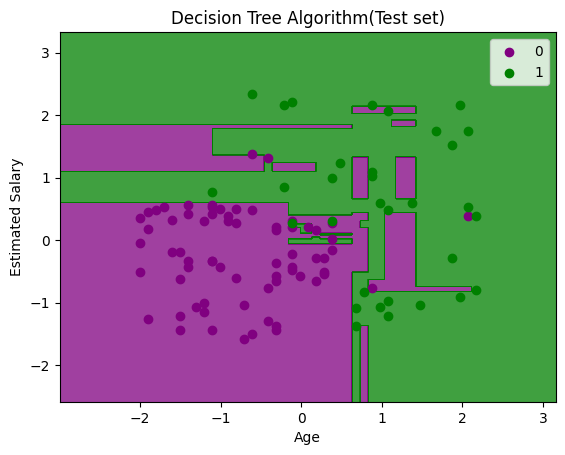

In [ ]:
#Visulaizing the test set result
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('purple','green' )))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
for i,j in enumerate(nm.unique(y_set)):
 mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
        c = ListedColormap(('purple', 'green'))(i), label = j)
mtp.title('Decision Tree Algorithm(Test set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()


**Practical No. : 8**

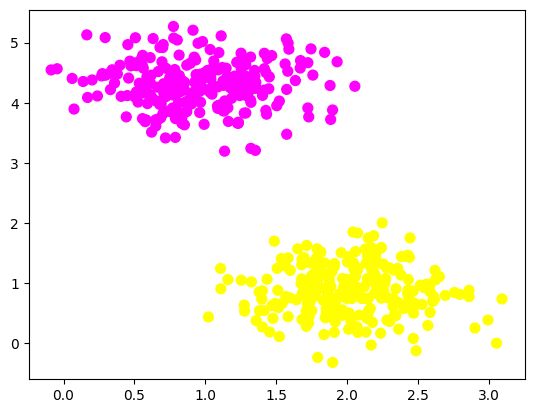

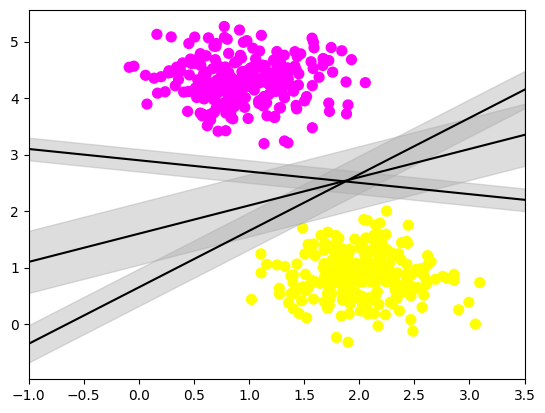

0.9111111111111111

In [ ]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np

X, Y = make_blobs(n_samples=500, centers=2, random_state=0, cluster_std=0.40)

import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring');
plt.show()

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);
plt.show()

df = pd.read_csv("IRIS.csv")
x = df[['sepal_length','sepal_width','petal_length','petal_width']]  #df[:,:-1]
y = df['species']

from sklearn.svm import SVC
clf = SVC(kernel='linear')
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

